In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/train-data/.xlsx
/kaggle/input/train-data/rzhd (1).xlsx


In [2]:
data = pd.read_excel('/kaggle/input/train-data/rzhd (1).xlsx')
data.head(5)

,Год,Месяц,ds_depart,Поезд/Нитка,Год операции,Месяц операции,ds_ord,Станция отп.,Станция назн.,Тип/Кл.обсл.,Кол-во прод. Мест,Сумма по бил.,Сумма по плац.,Сумма серв.усл.,Итого сумма билета,Расстояние,Курс рубля к доллару
0,2022,Январь,2022-01-01,0306С/А,2022,1,2022-01-01,АДЛЕР,МОСКВА КАЗ,П/3Б,1,1591.4,868.1,0.0,2459.5,1790,77.82
1,2022,Январь,2022-01-01,0306С/А,2022,1,2022-01-01,АДЛЕР,МОСКВА КАЗ,П/3Б,1,1591.4,868.1,0.0,2459.5,1790,77.82
2,2022,Январь,2022-01-01,0306С/А,2022,1,2022-01-01,АДЛЕР,МОСКВА КАЗ,П/3Б,1,1872.2,1021.3,163.4,3056.9,1790,77.82
3,2022,Январь,2022-01-01,0306С/А,2022,1,2022-01-01,АДЛЕР,МОСКВА КАЗ,П/3Э,1,1591.4,868.1,163.4,2622.9,1790,77.82
4,2022,Январь,2022-01-01,0306С/А,2022,1,2022-01-01,АДЛЕР,МОСКВА КАЗ,П/3Э,1,1591.4,868.1,163.4,2622.9,1790,77.82


In [3]:
data_2 = pd.read_excel('/kaggle/input/train-data/rzhd (1).xlsx', sheet_name='Лист2')
data_2.head(5)

,Год,Месяц,Город,Осадки,Темпетура воздуха,Каникулы,Праздничные дни
0,2022,Январь,Адлер,179.0,9.2,1,15
1,2022,Февраль,Адлер,118.0,7.1,1,9
2,2022,Март,Адлер,109.0,6.8,1,9
3,2022,Апрель,Адлер,116.0,12.3,0,9
4,2022,Май,Адлер,93.0,16.9,0,13


In [4]:
datat_2_ad = data_2[data_2['Город'] == 'Адлер']
datat_2_msk = data_2[data_2['Город'] == 'Москва']

datat_2_ad = datat_2_ad.rename(columns={'Осадки':'rain_adler', 'Темпетура воздуха':'temperature_adler'})
datat_2_msk = datat_2_msk.rename(columns={'Осадки':'rain_msk', 'Темпетура воздуха':'temperature_msk'})

data_one = data.merge(datat_2_ad[['Год', 'Месяц', 'rain_adler', 'temperature_adler']], on=['Год', 'Месяц'], how='left')
data_two = data_one.merge(datat_2_msk[['Год', 'Месяц', 'rain_msk', 'temperature_msk']], on=['Год', 'Месяц'], how='left')

data_final = data_two.merge(data_2[['Год', 'Месяц', 'Каникулы', 'Праздничные дни']], on=['Год', 'Месяц'], how='left')

In [5]:
data_final.head(3)

,Год,Месяц,ds_depart,Поезд/Нитка,Год операции,Месяц операции,ds_ord,Станция отп.,Станция назн.,Тип/Кл.обсл.,...,Сумма серв.усл.,Итого сумма билета,Расстояние,Курс рубля к доллару,rain_adler,temperature_adler,rain_msk,temperature_msk,Каникулы,Праздничные дни
0,2022,Январь,2022-01-01,0306С/А,2022,1,2022-01-01,АДЛЕР,МОСКВА КАЗ,П/3Б,...,0.0,2459.5,1790,77.82,179.0,9.2,49.8,"−6,2",1,15
1,2022,Январь,2022-01-01,0306С/А,2022,1,2022-01-01,АДЛЕР,МОСКВА КАЗ,П/3Б,...,0.0,2459.5,1790,77.82,179.0,9.2,49.8,"−6,2",1,15
2,2022,Январь,2022-01-01,0306С/А,2022,1,2022-01-01,АДЛЕР,МОСКВА КАЗ,П/3Б,...,0.0,2459.5,1790,77.82,179.0,9.2,49.8,"−6,2",1,15


In [6]:
word_stat = pd.read_excel('/kaggle/input/train-data/.xlsx')
word_stat.head(5)

,Год,Месяц,word_stat
0,2022,Январь,33839
1,2022,Февраль,40811
2,2022,Март,64267
3,2022,Апрель,89260
4,2022,Май,94299


In [7]:
data_final = data_final.merge(word_stat, on=['Год', 'Месяц'], how='left')

data_final = data_final.rename(columns={
    'Год': 'depat_year',
    'Месяц': 'depat_month',
    'Год операции': 'order_year',
    'Месяц операции': 'order_month',
    'Тип/Кл.обсл.': 'type',
    'Кол-во прод. Мест': 'orders',
    'Итого сумма билета ': 'amount',
    'Курс рубля к доллару': 'currency',
    'Каникулы': 'holidays',
    'Праздничные дни': 'weekends'
    })

In [8]:
data_final = data_final[['ds_depart',
                        'ds_ord',
                        'type',
                        'orders',
                        'amount',
                        'currency',
                        'rain_adler',
                        'temperature_adler',
                        'rain_msk',
                        'temperature_msk',
                        'holidays',
                        'weekends',
                        'word_stat'
                        ]]

In [9]:
data_final['temperature_adler'] = pd.to_numeric(data_final['temperature_adler'], errors='coerce')
data_final['temperature_msk'] = pd.to_numeric(data_final['temperature_msk'], errors='coerce')

data_final['temperature_msk'] = data_final['temperature_msk'].fillna(data_final['temperature_msk'].median())

data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22092 entries, 0 to 22091
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ds_depart          22092 non-null  datetime64[ns]
 1   ds_ord             22092 non-null  datetime64[ns]
 2   type               22092 non-null  object        
 3   orders             22092 non-null  int64         
 4   amount             22092 non-null  float64       
 5   currency           22092 non-null  float64       
 6   rain_adler         22092 non-null  float64       
 7   temperature_adler  22092 non-null  float64       
 8   rain_msk           22092 non-null  float64       
 9   temperature_msk    22092 non-null  float64       
 10  holidays           22092 non-null  int64         
 11  weekends           22092 non-null  int64         
 12  word_stat          22092 non-null  int64         
dtypes: datetime64[ns](2), float64(6), int64(4), object(1)
memory 

In [10]:
data_final.head(3)

,ds_depart,ds_ord,type,orders,amount,currency,rain_adler,temperature_adler,rain_msk,temperature_msk,holidays,weekends,word_stat
0,2022-01-01,2022-01-01,П/3Б,1,2459.5,77.82,179.0,9.2,49.8,13.6,1,15,33839
1,2022-01-01,2022-01-01,П/3Б,1,2459.5,77.82,179.0,9.2,49.8,13.6,1,15,33839
2,2022-01-01,2022-01-01,П/3Б,1,2459.5,77.82,179.0,9.2,49.8,13.6,1,15,33839


In [11]:
data_final = data_final[data_final.orders > 0]

In [12]:
data_final['price'] = data_final['amount'] / data_final['orders'] 

In [13]:
data_final = data_final[data_final.price > 2000]

In [14]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20662 entries, 0 to 22091
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ds_depart          20662 non-null  datetime64[ns]
 1   ds_ord             20662 non-null  datetime64[ns]
 2   type               20662 non-null  object        
 3   orders             20662 non-null  int64         
 4   amount             20662 non-null  float64       
 5   currency           20662 non-null  float64       
 6   rain_adler         20662 non-null  float64       
 7   temperature_adler  20662 non-null  float64       
 8   rain_msk           20662 non-null  float64       
 9   temperature_msk    20662 non-null  float64       
 10  holidays           20662 non-null  int64         
 11  weekends           20662 non-null  int64         
 12  word_stat          20662 non-null  int64         
 13  price              20662 non-null  float64       
dtypes: dat

In [15]:
data_final.head()

,ds_depart,ds_ord,type,orders,amount,currency,rain_adler,temperature_adler,rain_msk,temperature_msk,holidays,weekends,word_stat,price
0,2022-01-01,2022-01-01,П/3Б,1,2459.5,77.82,179.0,9.2,49.8,13.6,1,15,33839,2459.5
1,2022-01-01,2022-01-01,П/3Б,1,2459.5,77.82,179.0,9.2,49.8,13.6,1,15,33839,2459.5
2,2022-01-01,2022-01-01,П/3Б,1,2459.5,77.82,179.0,9.2,49.8,13.6,1,15,33839,2459.5
3,2022-01-01,2022-01-01,П/3Б,1,2459.5,77.82,179.0,9.2,49.8,13.6,1,15,33839,2459.5
4,2022-01-01,2022-01-01,П/3Б,1,3056.9,77.82,179.0,9.2,49.8,13.6,1,15,33839,3056.9


In [16]:
data_final_group = data_final.groupby(['ds_depart', 'type']).agg(
    sum_orders=('orders', 'sum'),
    amount=('amount', 'sum'),
    currency=('currency', 'mean'),
    rain_adler=('rain_adler', 'mean'),
    temperature_adler=('temperature_adler', 'mean'),
    rain_msk=('rain_msk', 'mean'),
    temperature_msk=('temperature_msk', 'mean'),
    holidays=('holidays', 'mean'),
    weekends=('weekends', 'mean'),
    word_stat=('word_stat', 'mean'),
    price=('price', 'mean')
).reset_index()

In [17]:
data_final_group

,ds_depart,type,sum_orders,amount,currency,rain_adler,temperature_adler,rain_msk,temperature_msk,holidays,weekends,word_stat,price
0,2022-01-01,К/2К,222,1209423.4,77.8200,179.0,9.2,49.8,13.6,1.0,15.0,33839.0,5348.050000
1,2022-01-01,Л/1Э,84,977256.4,77.8200,179.0,9.2,49.8,13.6,1.0,15.0,33839.0,11731.252000
2,2022-01-01,П/3Б,74,215232.6,77.8200,179.0,9.2,49.8,13.6,1.0,15.0,33839.0,2905.875758
3,2022-01-01,П/3Э,128,371317.8,77.8200,179.0,9.2,49.8,13.6,1.0,15.0,33839.0,2900.920312
4,2022-02-01,К/2К,46,240946.0,83.5485,118.0,7.1,45.9,13.6,1.0,9.0,40811.0,5331.730000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2023-06-01,К/2К,770,4863365.4,87.0341,16.6,21.7,69.5,16.8,1.0,9.0,123341.0,6406.993698
76,2023-06-01,К/2У,18,129054.6,87.0341,16.6,21.7,69.5,16.8,1.0,9.0,123341.0,7169.700000
77,2023-06-01,Л/1Л,244,2956448.2,87.0341,16.6,21.7,69.5,16.8,1.0,9.0,123341.0,12559.644452
78,2023-06-01,П/3Б,178,722786.2,87.0341,16.6,21.7,69.5,16.8,1.0,9.0,123341.0,4054.671765


### Modeling


In [18]:
sales_data = pd.DataFrame({
    'ds': data_final[['ds_depart', 'ds_ord']].apply(lambda row: '-'.join(row.astype(str)), axis=1),
    'y': data_final['orders'],
    'type': data_final['type'],
    'amount': data_final['amount'],
    'currency': data_final['currency'],
    'rain_adler': data_final['rain_adler'],
    'temperature_adler': data_final['temperature_adler'],
    'rain_msk': data_final['rain_msk'],
    'temperature_msk': data_final['temperature_msk'],
    'holidays': data_final['holidays'],
    'weekends': data_final['weekends'],
    'word_stat': data_final['word_stat']
})

In [19]:
sales_data.to_csv('final_data.csv')

10:31:04 - cmdstanpy - INFO - Chain [1] start processing
10:31:08 - cmdstanpy - INFO - Chain [1] done processing


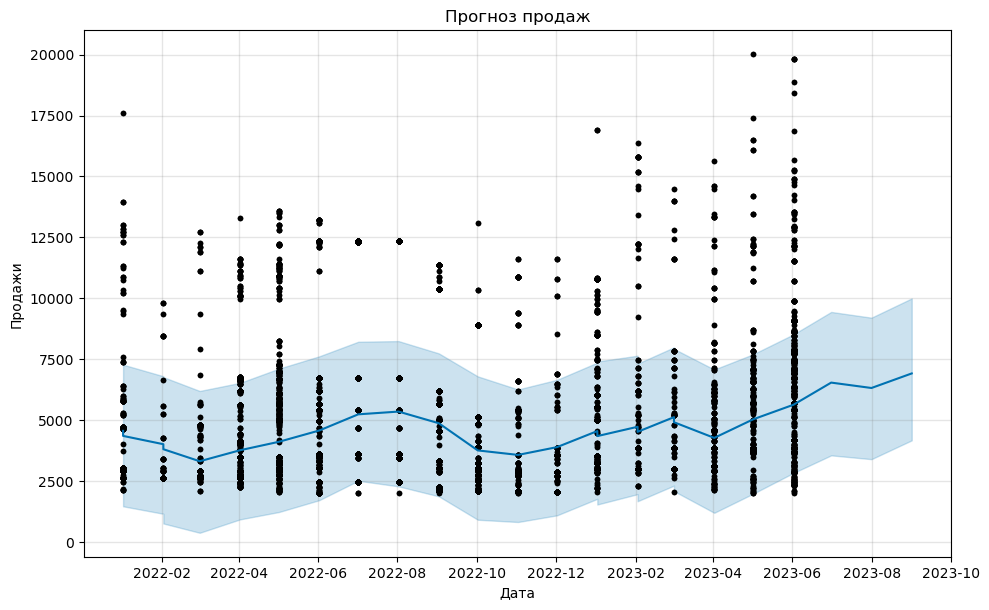

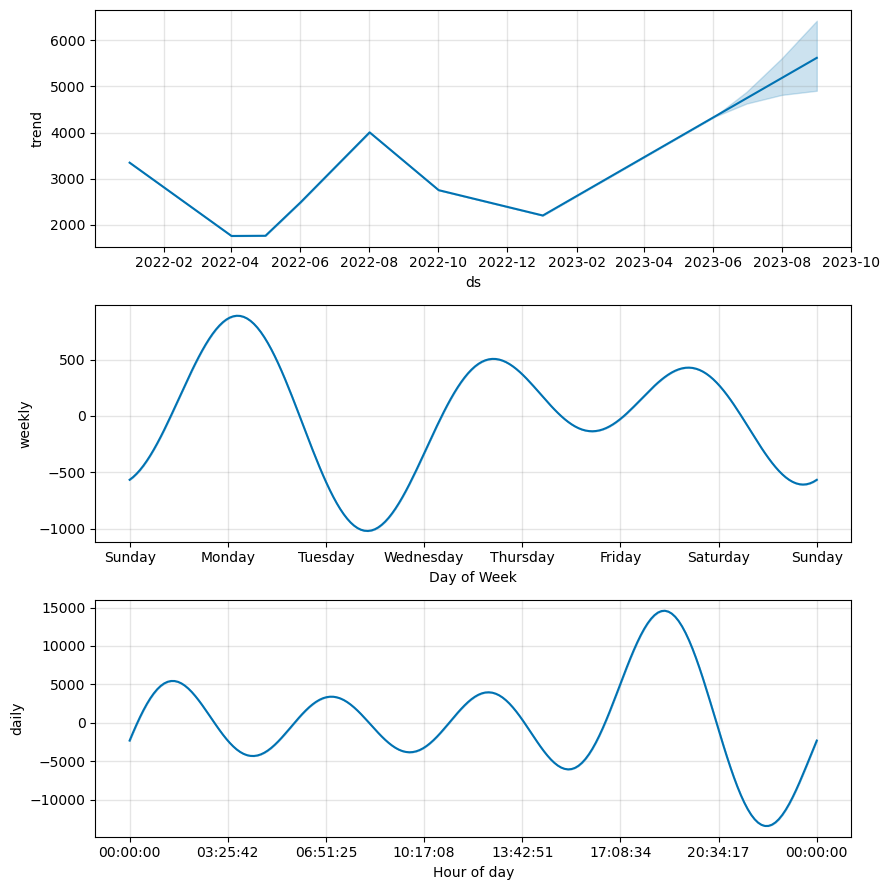

In [20]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Подготовка данных для модели Prophet
sales_data = pd.DataFrame({
    'ds': data_final[['ds_depart', 'ds_ord']].apply(lambda row: '-'.join(row.astype(str)), axis=1),
    'y': data_final['price'],
    #'ds_ord': data_final['ds_ord'],
    'orders': data_final['orders'],
    'type': data_final['type'],
    'amount': data_final['amount'],
    'currency': data_final['currency'],
    'rain_adler': data_final['rain_adler'],
    'temperature_adler': data_final['temperature_adler'],
    'rain_msk': data_final['rain_msk'],
    'temperature_msk': data_final['temperature_msk'],
    'holidays': data_final['holidays'],
    'weekends': data_final['weekends'],
    'word_stat': data_final['word_stat']
})

# Удаление информации о часовом поясе
sales_data['ds'] = pd.to_datetime(sales_data['ds']).dt.tz_localize(None)

# Обучение модели
model = Prophet()
model.fit(sales_data)

# Создание фрейма с будущими датами для прогнозирования
future_dates = model.make_future_dataframe(periods=3, freq='M')  # Прогноз на 12 месяцев вперед

# Прогнозирование
forecast = model.predict(future_dates)

# Визуализация результатов
model.plot(forecast, xlabel='Дата', ylabel='Продажи')
plt.title('Прогноз продаж')
plt.show()

fig = model.plot_components(forecast)
plt.show()


In [21]:
# получение прогнозов
predicted_prices = forecast['yhat']  # Предсказанные значения продаж

lower_bound = forecast['yhat_lower']  # Нижняя граница прогноза
upper_bound = forecast['yhat_upper']  # Верхняя граница прогноза


forecast_data = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


In [22]:
forecast_data.head(5)

,ds,yhat,yhat_lower,yhat_upper
0,2022-01-01 20:21:00,4570.228072,1884.389643,7512.004001
1,2022-01-01 20:22:00,4363.404403,1477.349647,7284.495094
2,2022-02-01 20:21:00,4023.406972,1170.433661,6810.360625
3,2022-02-01 20:22:00,3817.805447,772.954021,6773.733086
4,2022-03-01 20:22:00,3324.243736,391.664532,6205.931875


In [23]:
predicted_prices = forecast[['ds', 'yhat']]  # Дата и предсказанные значения продаж
print(predicted_prices)


                    ds         yhat
0  2022-01-01 20:21:00  4570.228072
1  2022-01-01 20:22:00  4363.404403
2  2022-02-01 20:21:00  4023.406972
3  2022-02-01 20:22:00  3817.805447
4  2022-03-01 20:22:00  3324.243736
5  2022-04-01 20:22:00  3775.562123
6  2022-05-01 20:22:00  4123.129677
7  2022-06-01 20:22:00  4585.107352
8  2022-07-01 20:22:00  5248.153654
9  2022-08-01 20:22:00  5360.834771
10 2022-09-01 20:22:00  4882.942347
11 2022-10-01 20:22:00  3768.358326
12 2022-11-01 20:22:00  3584.301866
13 2022-12-01 20:22:00  3903.864496
14 2023-01-01 20:22:00  4561.860981
15 2023-01-01 20:23:00  4355.689334
16 2023-02-01 20:22:00  4737.381612
17 2023-02-01 20:23:00  4530.055396
18 2023-03-01 20:22:00  5132.219361
19 2023-03-01 20:23:00  4924.893145
20 2023-04-01 20:23:00  4281.726568
21 2023-05-01 20:23:00  5044.623988
22 2023-06-01 20:23:00  5641.539248
23 2023-06-30 20:23:00  6549.119010
24 2023-07-31 20:23:00  6327.846674
25 2023-08-31 20:23:00  6924.761934


10:31:10 - cmdstanpy - INFO - Chain [1] start processing
10:31:10 - cmdstanpy - INFO - Chain [1] done processing
10:31:10 - cmdstanpy - INFO - Chain [1] start processing
10:31:10 - cmdstanpy - INFO - Chain [1] done processing
10:31:10 - cmdstanpy - INFO - Chain [1] start processing
10:31:10 - cmdstanpy - INFO - Chain [1] done processing
10:31:10 - cmdstanpy - INFO - Chain [1] start processing
10:31:10 - cmdstanpy - INFO - Chain [1] done processing
10:31:10 - cmdstanpy - INFO - Chain [1] start processing
10:31:10 - cmdstanpy - INFO - Chain [1] done processing
10:31:10 - cmdstanpy - INFO - Chain [1] start processing
10:31:10 - cmdstanpy - INFO - Chain [1] done processing
10:31:10 - cmdstanpy - INFO - Chain [1] start processing
10:31:10 - cmdstanpy - INFO - Chain [1] done processing
/tmp/ipykernel_28/1929267170.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

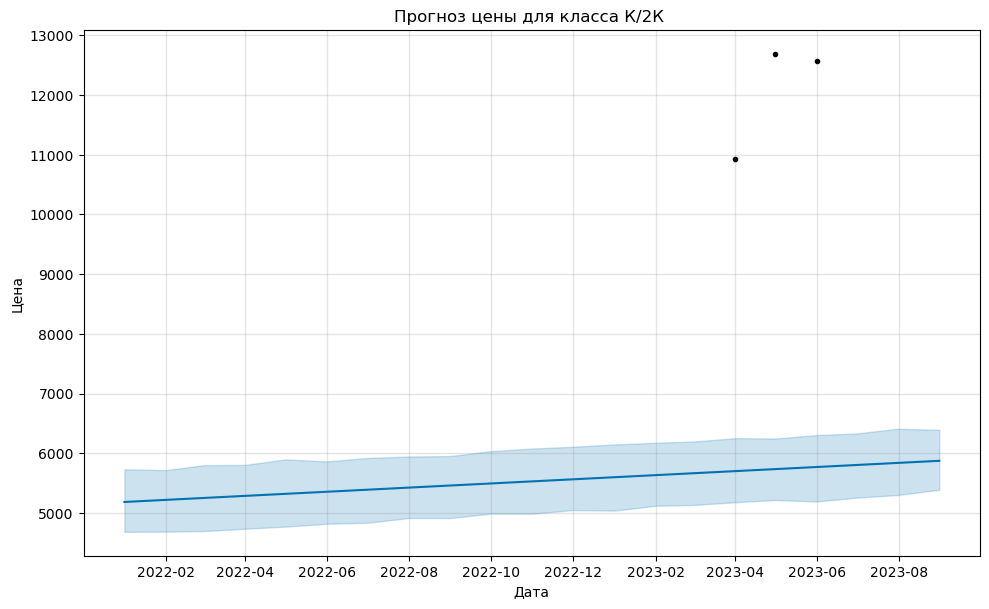

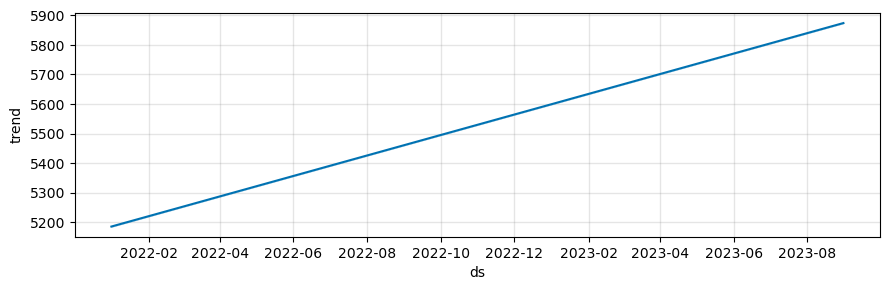

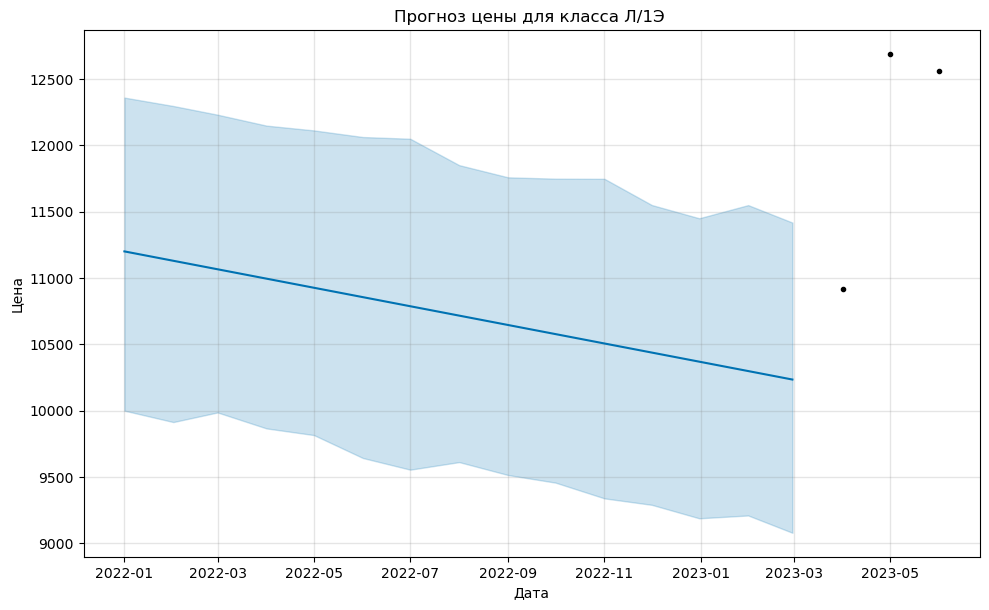

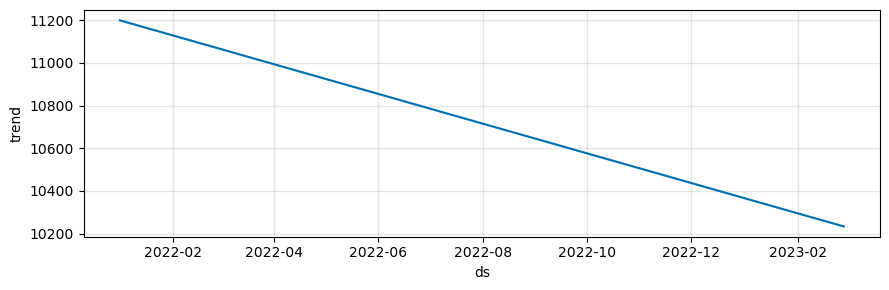

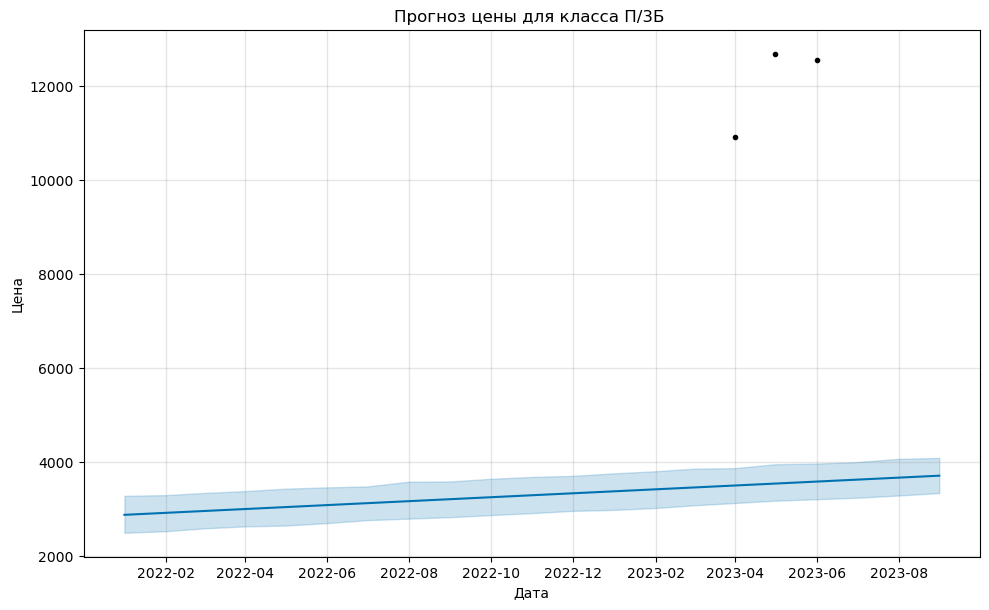

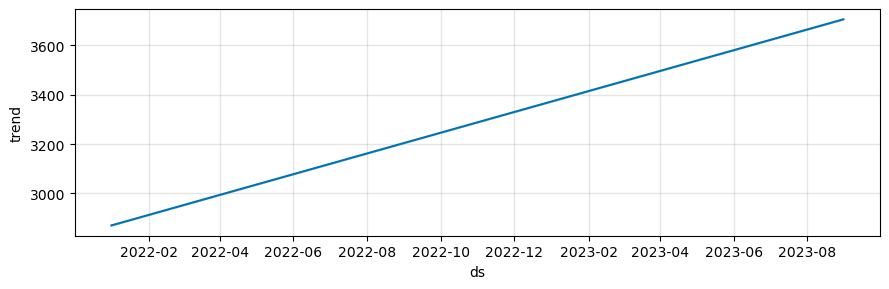

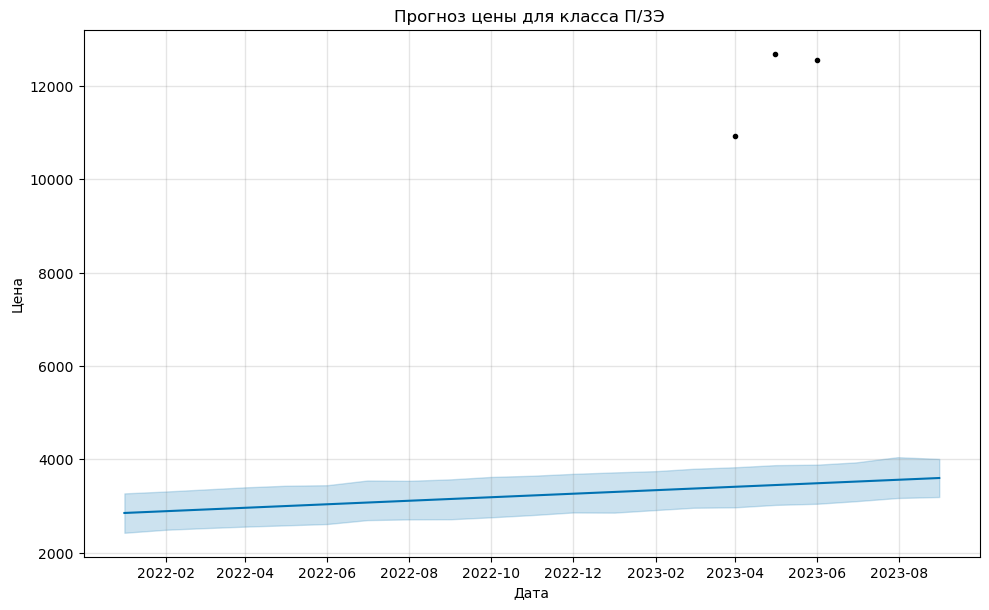

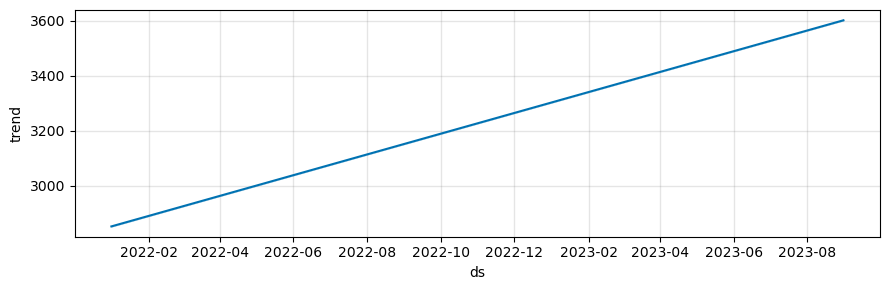

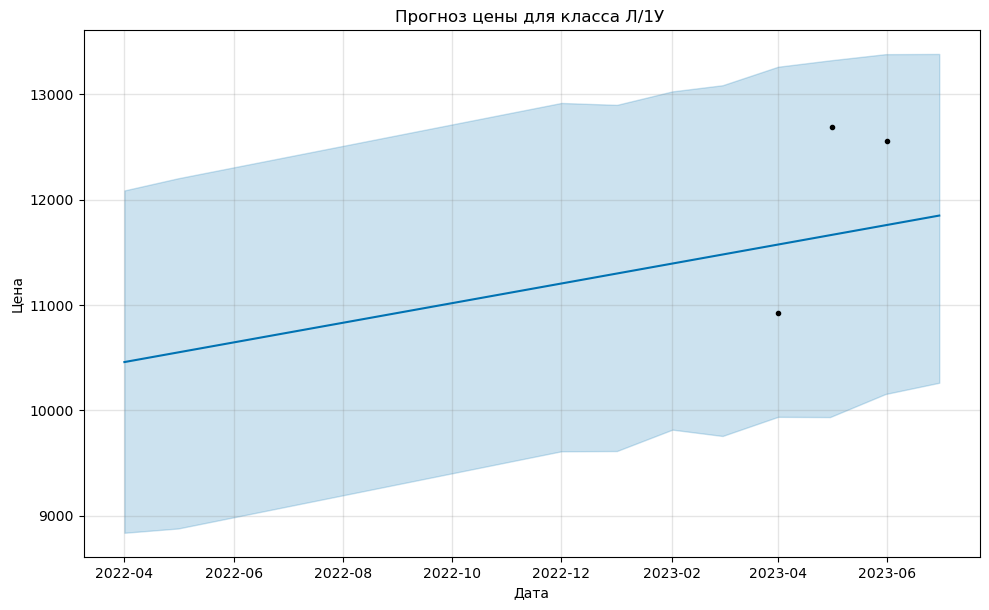

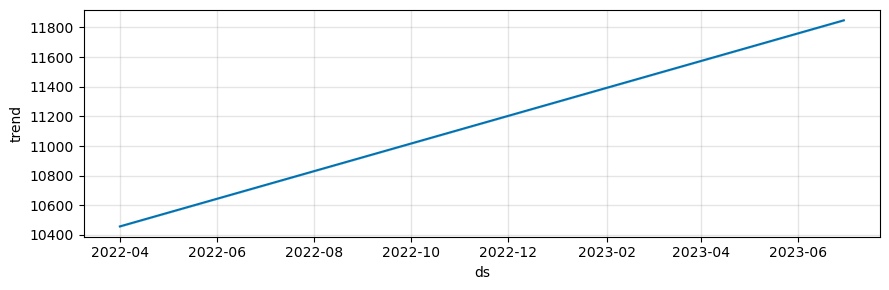

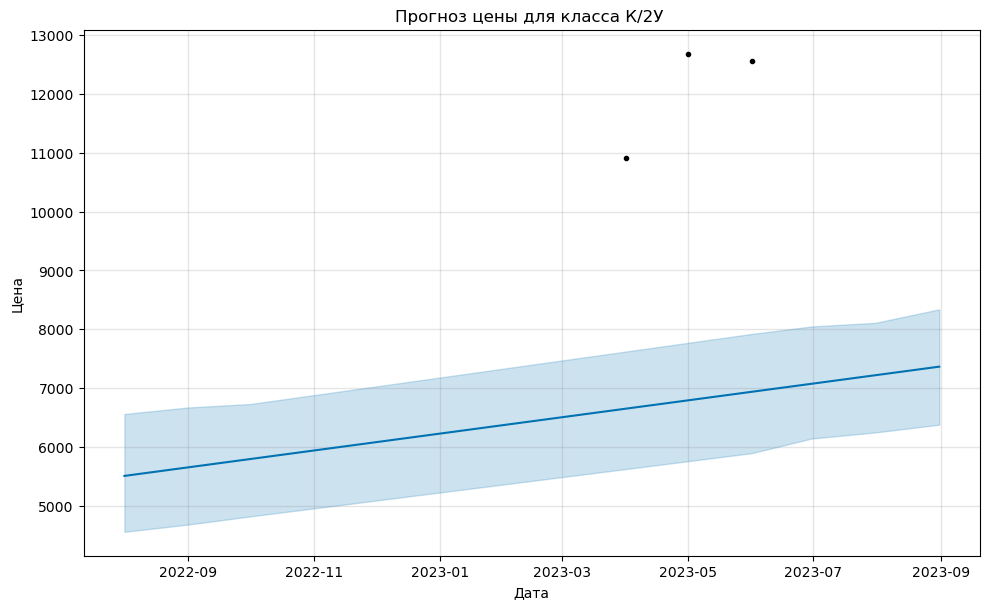

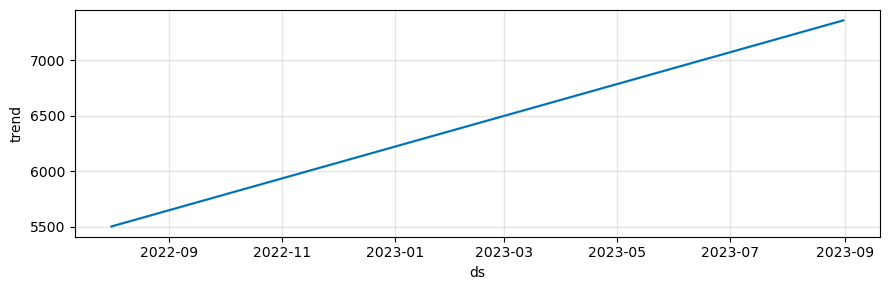

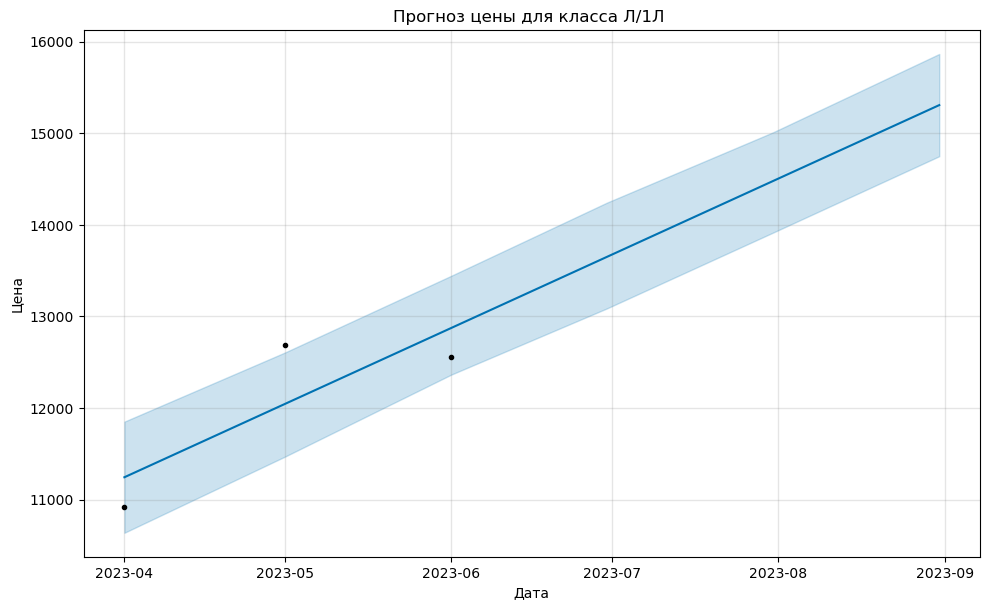

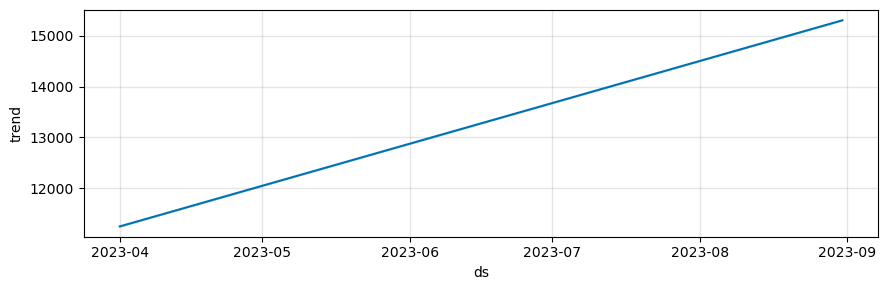

In [24]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Создание отдельных моделей для каждого класса в столбце 'type'
class_names = data_final_group['type'].unique()
models = {}

for class_name in class_names:
    # Фильтрация данных для текущего класса
    filtered_data = data_final_group[data_final_group['type'] == class_name]
    
    # Подготовка данных для модели Prophet
    sales_data = pd.DataFrame({
        'ds': filtered_data['ds_depart'],
        'y': filtered_data['price'],
        'orders': filtered_data['sum_orders'],
        'type': filtered_data['type'],
        'amount': filtered_data['amount'],
        'currency': filtered_data['currency'],
        'rain_adler': filtered_data['rain_adler'],
        'temperature_adler': filtered_data['temperature_adler'],
        'rain_msk': filtered_data['rain_msk'],
        'temperature_msk': filtered_data['temperature_msk'],
        'holidays': filtered_data['holidays'],
        'weekends': filtered_data['weekends'],
        'word_stat': filtered_data['word_stat']
    })

    
    # Удаление информации о часовом поясе
    #sales_data['ds'] = pd.to_datetime(sales_data['ds']).dt.tz_localize(None)
    
    # Обучение модели
    model = Prophet()
    model.fit(sales_data)
    
    # Сохранение модели для текущего класса
    models[class_name] = model

# Прогнозирование для каждой модели
forecasts = {}

for class_name, model in models.items():
    # Создание фрейма с будущими датами для прогнозирования
    future_dates = model.make_future_dataframe(periods=3, freq='M')  # Прогноз на 3 месяца вперед
    
    # Прогнозирование
    forecast = model.predict(future_dates)
    
    # Добавление прогноза для текущего класса в итоговый датафрейм
    forecast_data_class = forecast[['ds', 'yhat']]
    forecast_data_class['type'] = class_name
    forecast_data_class.rename(columns={'yhat': 'прогноз цены'}, inplace=True)
    forecast_data = forecast_data.append(forecast_data_class, ignore_index=True)
    
    # Сохранение прогноза для текущего класса
    forecasts[class_name] = forecast

# Визуализация результатов для каждого класса
for class_name, forecast in forecasts.items():
    model.plot(forecast, xlabel='Дата', ylabel='Цена')
    plt.title(f'Прогноз цены для класса {class_name}')
    plt.show()

    fig = model.plot_components(forecast)
    plt.show()


In [25]:
forecast_data[forecast_data['ds'] == '2023-08-31 00:00:00']


,ds,yhat,yhat_lower,yhat_upper,прогноз цены,type
46,2023-08-31,NaN,NaN,NaN,5874.133778,К/2К
82,2023-08-31,NaN,NaN,NaN,3704.411244,П/3Б
103,2023-08-31,NaN,NaN,NaN,3600.917652,П/3Э
120,2023-08-31,NaN,NaN,NaN,7361.833435,К/2У
126,2023-08-31,NaN,NaN,NaN,15306.936209,Л/1Л


In [26]:
forecast_data[forecast_data['ds'] == '2022-09-01 00:00:00']

,ds,yhat,yhat_lower,yhat_upper,прогноз цены,type
34,2022-09-01,NaN,NaN,NaN,5461.015409,К/2К
55,2022-09-01,NaN,NaN,NaN,10644.880300,Л/1Э
70,2022-09-01,NaN,NaN,NaN,3204.489415,П/3Б
91,2022-09-01,NaN,NaN,NaN,3151.804630,П/3Э
115,2022-09-01,NaN,NaN,NaN,5649.480396,К/2У


### оценка качетва работы модели на примере 2 квартала 2023 года

In [48]:
actual_data = data_final_group[data_final_group['ds_depart'].isin(['2023-04-01', '2023-05-01','2023-06-01'])][['ds_depart', 'type', 'price']]

forecast_data_ = forecast_data[forecast_data['ds'].isin(['2023-04-01', '2023-05-01','2023-06-01'])][['ds', 'type', 'прогноз цены']]

forecast_data_ = forecast_data_.rename(columns={'ds':'ds_depart'})

merged_data = forecast_data_.merge(actual_data, on=['ds_depart', 'type'], how='inner')

In [107]:
from sklearn.metrics import r2_score

# Расчет R^2 для каждого класса
r2_scores = {}

for class_name in merged_data.type.unique():
    # Фильтрация прогнозных значений для текущего класса
    forecast_class = merged_data[merged_data['type'] == class_name]
    
    # Получение фактических значений цен для текущего класса
    actual_prices = forecast_class['price']
    
    # Получение прогнозных значений цен для текущего класса
    forecast_prices = forecast_class['прогноз цены']
    
    # Расчет R^2
    r2 = r2_score(actual_prices, forecast_prices)
    
    # Сохранение R^2 для текущего класса
    if not np.isnan(r2):
        r2_scores[class_name] = r2

# Вывод R^2 для каждого класса
for class_name, r2 in r2_scores.items():
    print(f"R^2 для класса {class_name}: {r2}")


R^2 для класса К/2К : 0.08060885922078775
R^2 для класса П/3Б : -0.11162439890891585
R^2 для класса П/3Э : -0.27372034087049557
R^2 для класса Л/1Л : 0.6832341624503686


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
